<a href="https://colab.research.google.com/github/ardasdasdas/computer-vision/blob/main/computer_vision_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


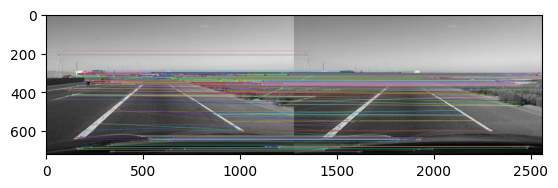

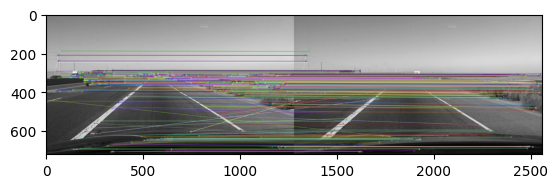

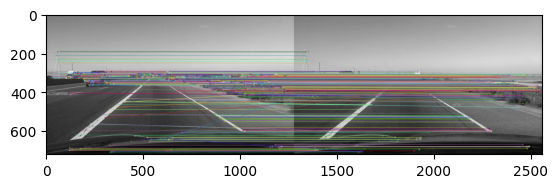

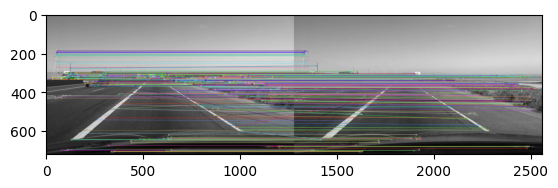

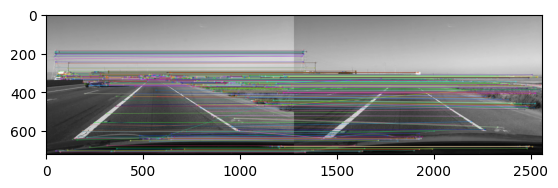

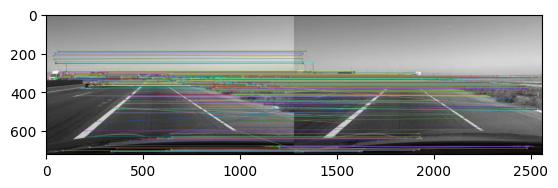

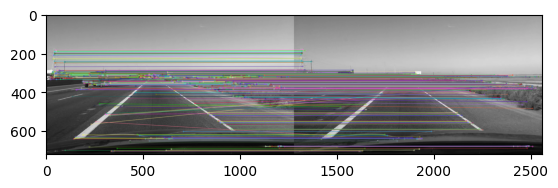

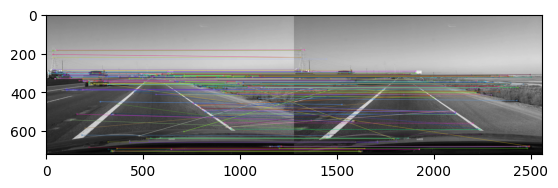

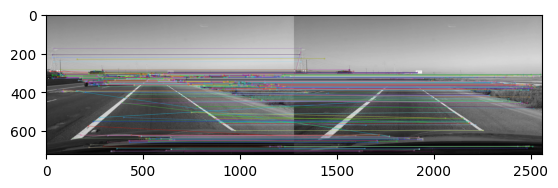

KeyboardInterrupt: 

In [ ]:
def SIFT(sift, frame1, frame2):

  img1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
  img2 = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)

  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)

  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)

  # Apply ratio test
  good = []
  for m,n in matches:
    if m.distance < 0.75*n.distance:
      good.append([m])

  # cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  plt.imshow(img3),plt.show()

def main(video_path):

  cap = cv.VideoCapture(video_path)

  if not cap.isOpened():
    print("Error")
    return

  sf = cv.SIFT_create()

  while True:
    ret1, frame1 = cap.read()
    ret2, frame2 = cap.read()

    if not ret1 or not ret2:
      break

    SIFT(sf, frame1, frame2)

if __name__ == "__main__":
    video_path = '/content/drive/MyDrive/vid/video.mp4'
    main(video_path)
